In [54]:
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib.patches import PathPatch
from matplotlib.path import Path

In [55]:
def plot_matrix(m, one_over_root, one_over_p):
  codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
  codes += [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
  vertices = [(0, 0), (0, one_over_root), (one_over_root, one_over_root), (one_over_root, 0), (0, 0)]
  vertices += [(0, 0), (0, one_over_p), (one_over_p, one_over_p), (one_over_p, 0), (0, 0)]
  path = Path(vertices, codes)
  pathpatch = PathPatch(path, facecolor='none', edgecolor='green')
  fig, ax = plt.subplots()
  ax.add_patch(pathpatch)

  def safe_log(x):
    if x == 0:
        return 0
    else:
        return math.log(x)

  safe_log = np.vectorize(safe_log)
  #m = -np.log(m)
  m = safe_log(m)
  m = np.transpose(m)
  #m = np.flipud(m)
  plt.imshow(m, cmap='hot', interpolation='nearest')
  plt.gca().invert_yaxis()
  plt.colorbar()
  plt.show()

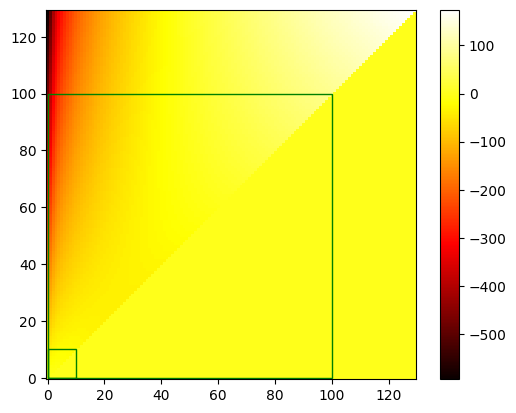

In [82]:
p = 0.01
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

N = math.floor(1.3 * one_over_p)


m = np.zeros((N, N))


# set boundary
for b in range(N):
    m[0][b] = p**b

for a in range(1, N):
    for b in range(a, N):
        m[a][b] = 2*a*p*m[a][b-1] + 2*b*p*m[a-1][b] + 4*p*m[a-1][b-1]

plot_matrix(m, one_over_root, one_over_p)

0.07071067811865475
1.12


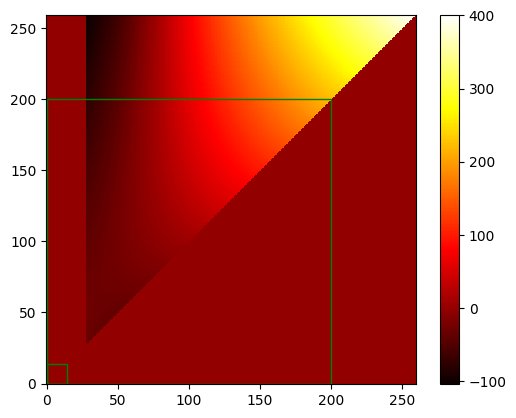

In [78]:
p = 0.005
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

N = math.floor(1.3 * one_over_p)

print(math.sqrt(p))

m = np.zeros((N, N))


# set boundary
a0 = 2*one_over_root
for b in range(a0, N):
    m[a0][b] = (4*a0*p)**(a0+b) * (b/a0)**a0

print(8*a0*p)
for a in range(a0 + 1, N):
    for b in range(a, N):
        m[a][b] = 2*a*p*m[a][b-1] + 2*b*p*m[a-1][b] + 4*p*m[a-1][b-1]

plot_matrix(m, one_over_root, one_over_p)

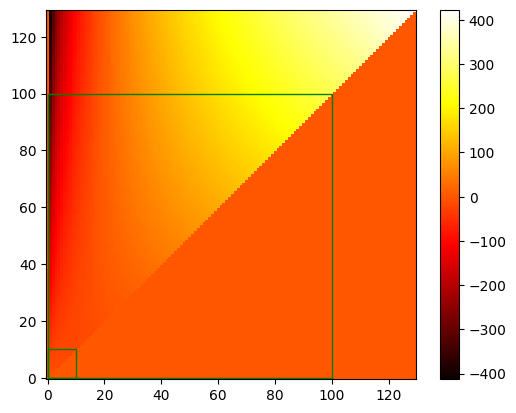

In [83]:
p = 0.01
one_over_p = math.floor(1/p)
one_over_root = math.floor(1/math.sqrt(p))

N = math.floor(1.3 * one_over_p)

m = np.zeros((N, N))

for a in range(1, N):
    for b in range(a, N):
        m[a][b] = (4*a*p)**(a+b) * (b/a)**a

plot_matrix(m, one_over_root, one_over_p)